## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- dnn_app_utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook.
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work.

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2



## 2 - Dataset

You will use the same "Cat vs non-Cat" dataset as in "Logistic Regression as a Neural Network" (Assignment 2). The model you had built had 70% test accuracy on classifying cats vs non-cats images. Hopefully, your new model will perform a better!

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cell below.

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images. 

y = 1. It's a cat picture.


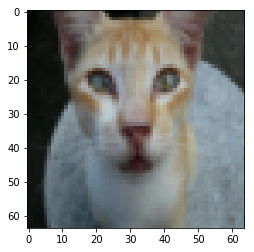

In [3]:
# Example of a picture
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.

<img src="images/imvectorkiank.png" style="width:450px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

In [5]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [6]:
### Debug initialization ####
n_x = 3     # num_px * num_px * 3
n_h1 = 4
n_h2 = 7
n_y = 1
layers_dims = (n_x, n_h1, n_h2, n_y)
np.random.seed(1)
#Debug initialize
parameters = initialize_parameters_deep(layers_dims)
print(parameters['W1'])
print(parameters['W2'])

[[ 0.93781623 -0.35319773 -0.3049401 ]
 [-0.61947872  0.49964333 -1.32879399]
 [ 1.00736754 -0.43948301  0.18419731]
 [-0.14397405  0.84414841 -1.18942279]]
[[-0.1612086  -0.19202718  0.56688472 -0.54994563]
 [-0.0862141  -0.43892921  0.02110687  0.29140761]
 [-0.55030959  0.57236185  0.45079536  0.25124717]
 [ 0.45042797 -0.34186393 -0.06144511 -0.46788472]
 [-0.13394404  0.26517773 -0.34583038 -0.19837676]
 [-0.34358635 -0.42260282 -0.33562307 -0.0063323 ]
 [-0.55865517  0.11720785  0.82990109  0.37102208]]


In [7]:
np.random.seed(1)
X= np.random.uniform(0, 1, (n_x,1))
X

array([[4.17022005e-01],
       [7.20324493e-01],
       [1.14374817e-04]])

In [8]:
AL, caches = L_model_forward(X, parameters)
AL

array([[0.48340483]])

In [9]:
grads= L_model_backward(AL, np.array([[1]]), caches)
grads['dW2']

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.02368126,  0.01757697,  0.01794578,  0.09495585],
       [ 0.01993361,  0.01479534,  0.0151058 ,  0.07992872],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00509348, -0.00378054, -0.00385987, -0.02042356]])

In [10]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [11]:
np.savetxt("../network/train_x.csv", train_x, delimiter=",")
np.savetxt("../network/train_y.csv", train_y, delimiter=",")

In [12]:
np.random.seed(1)
parameters = initialize_parameters_deep(layers_dims)
AL, caches = L_model_forward(train_x, parameters)
AL

array([[0.55893222, 0.58946891, 0.6117565 , 0.52893672, 0.63110697,
        0.58264379, 0.55652116, 0.50163581, 0.56419673, 0.54498116,
        0.60895365, 0.61711872, 0.59900556, 0.63670604, 0.59071161,
        0.70225162, 0.58916264, 0.67616388, 0.60341067, 0.5743451 ,
        0.60422171, 0.5768078 , 0.64351136, 0.6600246 , 0.66032722,
        0.53392824, 0.62094069, 0.5850552 , 0.5801449 , 0.59830082,
        0.56988221, 0.65897529, 0.58262912, 0.66742252, 0.59293297,
        0.55231835, 0.55894744, 0.55363025, 0.51792745, 0.6199034 ,
        0.61203414, 0.5789821 , 0.63664657, 0.62345464, 0.56825509,
        0.55307803, 0.64356209, 0.58381627, 0.60326641, 0.57609804,
        0.64855074, 0.5867378 , 0.60971581, 0.61903345, 0.56811604,
        0.62251748, 0.57811722, 0.64820438, 0.54374214, 0.54747803,
        0.55780033, 0.59000156, 0.5946332 , 0.57453264, 0.6150257 ,
        0.5559803 , 0.61366413, 0.54613142, 0.60085496, 0.59572995,
        0.62497464, 0.53557741, 0.54208569, 0.59

In [15]:
grads= L_model_backward(AL, train_y, caches)
grads['dW1']

array([[ 0.02223127,  0.02694779,  0.02155859, ...,  0.02135189,
         0.02459546,  0.01567405],
       [-0.01355345, -0.01592918, -0.01203554, ..., -0.01306601,
        -0.0151908 , -0.01004365],
       [ 0.00479684,  0.00557402,  0.00469332, ...,  0.00832289,
         0.00841248,  0.00630558],
       ...,
       [ 0.02225063,  0.02673607,  0.02145785, ...,  0.01882232,
         0.02287784,  0.01432669],
       [ 0.00064784,  0.00075776,  0.00101064, ...,  0.00023422,
         0.00059833,  0.00039404],
       [-0.01321156, -0.01627463, -0.01295946, ..., -0.01232409,
        -0.01437568, -0.00954212]])

You will now train the model as a 4-layer neural network. 

Run the cell below to train your model. The cost should decrease on every iteration. It may take up to 5 minutes to run 2500 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


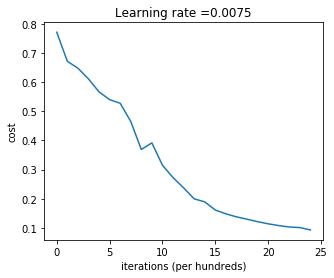

In [59]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

**Expected Output**:
<table> 
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.771749 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.672053 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2400**</td>
        <td> 0.092878 </td>
    </tr>
</table>

In [60]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


<table>
    <tr>
    <td>
    **Train Accuracy**
    </td>
    <td>
    0.985645933014
    </td>
    </tr>
</table>

In [24]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


**Expected Output**:

<table> 
    <tr>
        <td> **Test Accuracy**</td>
        <td> 0.8 </td>
    </tr>
</table>

Congrats! It seems that your 4-layer neural network has better performance (80%) than your 2-layer neural network (72%) on the same test set. 

This is good performance for this task. Nice job! 

Though in the next course on "Improving deep neural networks" you will learn how to obtain even higher accuracy by systematically searching for better hyperparameters (learning_rate, layers_dims, num_iterations, and others you'll also learn in the next course). 

##  6) Results Analysis

First, let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

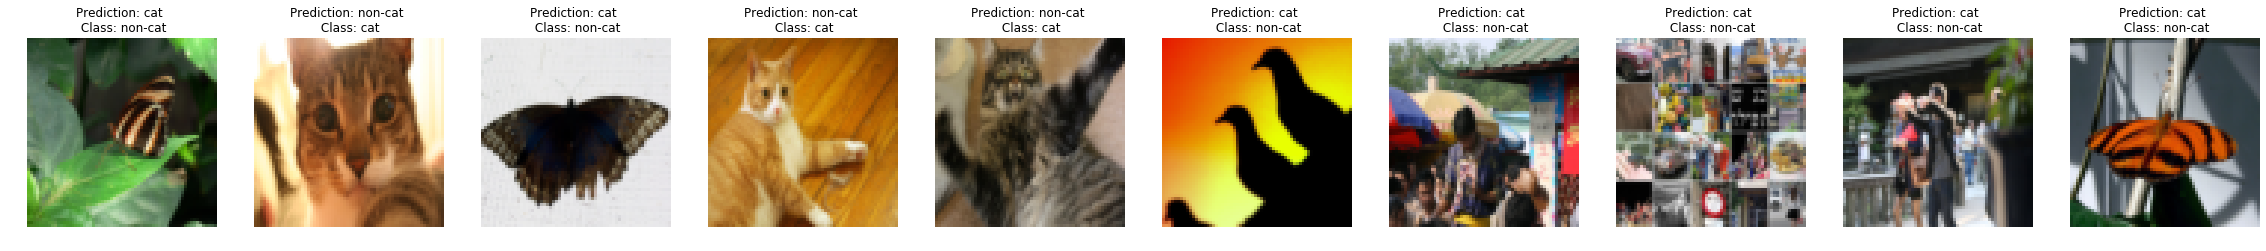

In [16]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

**A few types of images the model tends to do poorly on include:** 
- Cat body in an unusual position
- Cat appears against a background of a similar color
- Unusual cat color and species
- Camera Angle
- Brightness of the picture
- Scale variation (cat is very large or small in image) 

## 7) Test with your own image (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

/Users/rene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
/Users/rene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


Accuracy: 0.0
y = 0.0, your L-layer model predicts a "non-cat" picture.


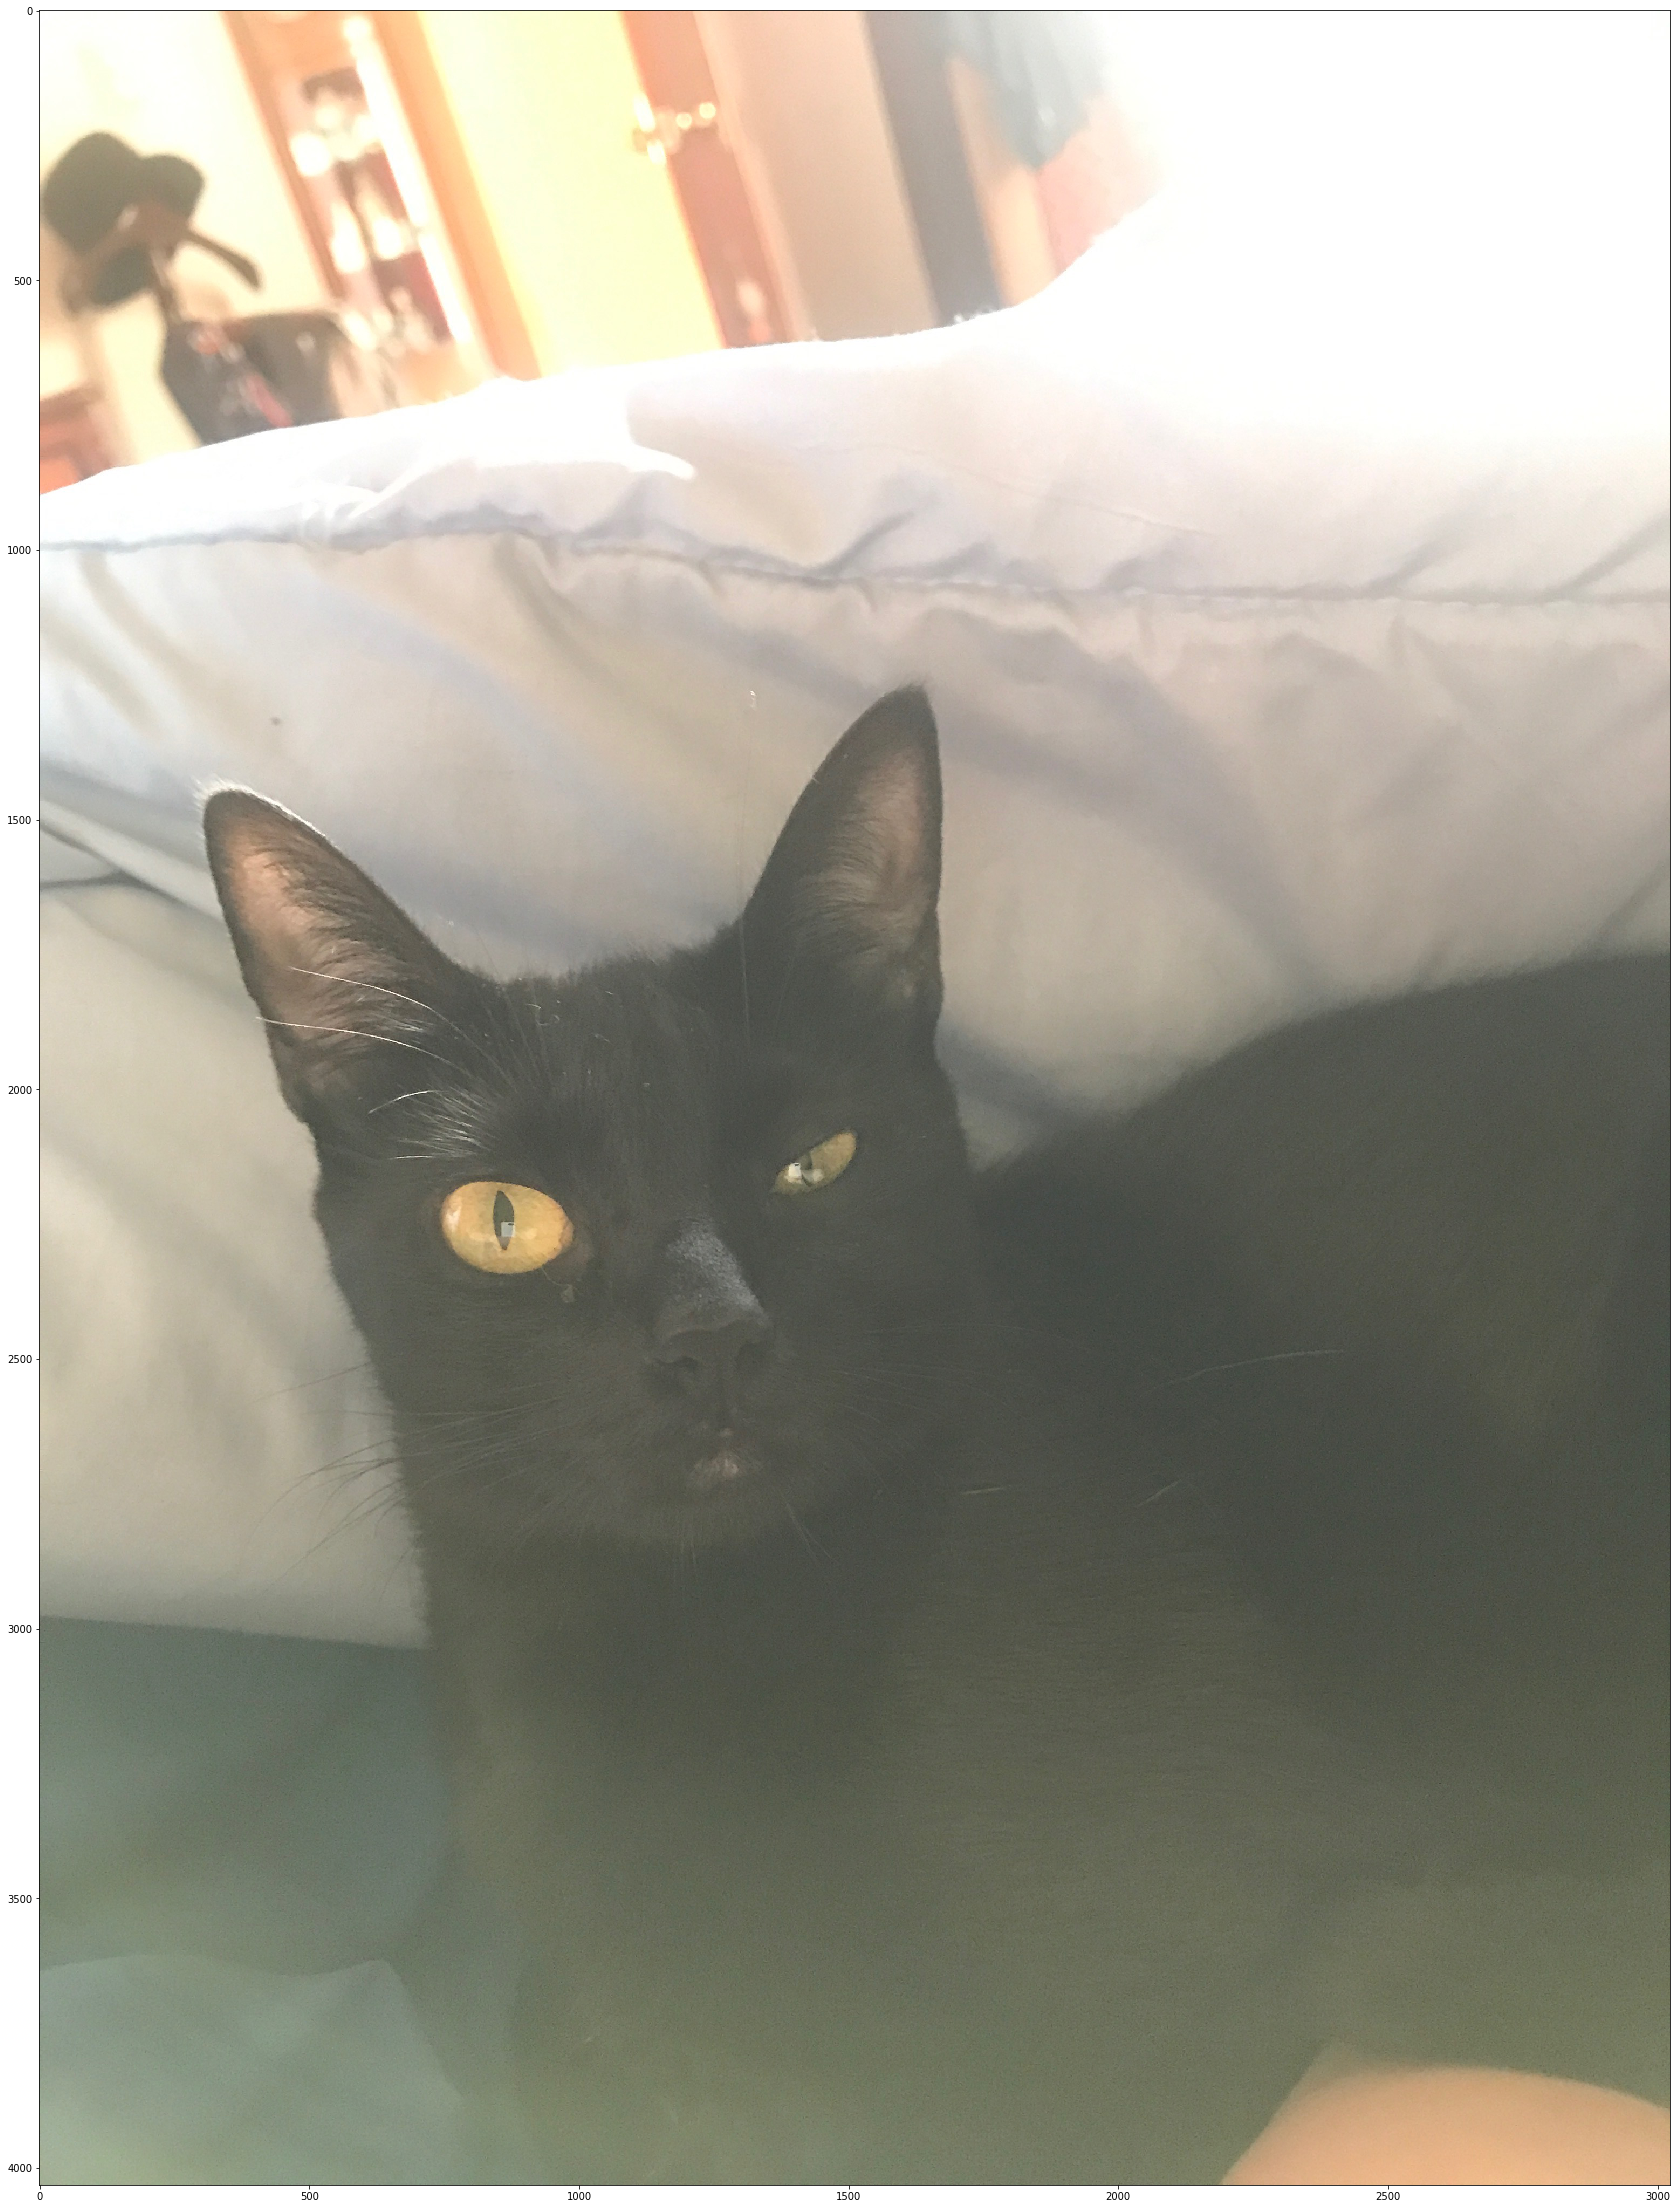

In [17]:
## START CODE HERE ##
my_image = "my_image5.jpg" # change this to the name of your image file 
my_label_y = 1 # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_image = my_image/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

**References**:

- for auto-reloading external module: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython